# MICCoM School 2017 Ex#2 : Computation of the dielectric screening

We are going to dive into the calculation of the dielectric screening done in Exercise #1.

In this excercixe we will focus on the input for `wstat.x`.

In [1]:
# download the pseudopotentials
!wget -N -q http://www.quantum-simulation.org/potentials/sg15_oncv/upf/Si_ONCV_PBE-1.2.upf
!wget -N -q http://www.quantum-simulation.org/potentials/sg15_oncv/upf/H_ONCV_PBE-1.2.upf

# download the input files
!wget -N -q http://www.west-code.org/doc/training/silane/pw.in
!wget -N -q http://www.west-code.org/doc/training/silane/wstat.in

In order to compute the dielectric screening we need to read the output of a DFT calculation, therefore as first step we run the DFT calculation invoking the executable `pw.x` on 8 CPU cores.

In [ ]:
!mpirun -n 8 pw.x -i pw.in > pw.out

## 2.1 : Iterative diagonalization of the static dielectric matrix

Wstat will read the output of DFT and will compute the static dielectric screening from first principles. An iterative diagonalization of the dielectric matrix is performed:

\begin{equation}
\epsilon_{\mathbf{G},\mathbf{G^\prime}}(\omega=0) = \sum_{i=1}^{\texttt{n_pdep_eigen}} \, \phi_i(\mathbf{G}) \, \lambda_i \phi^\ast_i(\mathbf{G^\prime})
\end{equation}

where $\phi_i$ and $\lambda_i$ are the eigenvectors and eigenvalues of the dielectric matrix (extressed here in terms of plane waves).

The diagonalization is started with random potentials and then iterated using the Davidson algorithm. Details about the implementation are described in [J. Chem. Theory Comput. 11, 2680 (2015)](https://pubs.acs.org/doi/full/10.1021/ct500958p#showFigures) :

<img src="https://pubs.acs.org/cms/10.1021/ct500958p/asset/images/medium/ct-2014-00958p_0003.gif" width="50%">

Let's give a quick look at the input for `wstat.x` (description of the input variables for `wstat.x` can be found here: http://www.west-code.org/doc/West/latest/manual.html#wstat-control).

In [2]:
!cat wstat.in

input_west:
    qe_prefix: silane
    west_prefix: silane
    outdir: ./

wstat_control:
    wstat_calculation: S
    n_pdep_eigen: 50

In this case we are computing 50 eigenpotentials $\phi_i$.

We run `wstat.x` on 8 cores.

In [ ]:
!mpirun -n 8 wstat.x -i wstat.in > wstat.out

We now load the output (JSON) of the `wstat.x` calculation, which can be found in the `wstat.save` folder.

In [3]:
import json

# read data from JSON file
with open('silane.wstat.save/wstat.json', 'r') as file:
    data = json.load(file)

# pretty print the data
print(json.dumps(data, indent=2))

{
  "runjob": {
    "startdate": "17Aug2022",
    "starttime": "11:48:16",
    "completed": true,
    "endtime": "11:49: 3",
    "enddate": "17Aug2022"
  },
  "software": {
    "package": "WEST",
    "program": "WSTAT",
    "version": "5.0.0",
    "westgit": "v5.0.0-117-ga4764c0",
    "website": "http://www.west-code.org",
    "citation": "M. Govoni et al., J. Chem. Theory Comput. 11, 2680 (2015).",
    "qeversion": "7.1"
  },
  "config": {
    "io": {
      "islittleendian": true
    }
  },
  "parallel": {
    "nranks": 2,
    "nimage": 1,
    "npool": 1,
    "nbgrp": 1,
    "nrg": 2,
    "nproc": 36,
    "nthreads": 18
  },
  "input": {
    "input_west": {
      "qe_prefix": "silane",
      "west_prefix": "silane",
      "outdir": "./"
    },
    "wstat_control": {
      "wstat_calculation": "S",
      "n_pdep_eigen": 50,
      "n_pdep_times": 4,
      "n_pdep_maxiter": 100,
      "n_dfpt_maxiter": 250,
      "n_pdep_read_from_file": 0,
      "n_steps_write_restart": 1,
      "trev_p

We plot the 50 eigenvalues $\lambda_i$ of the dielectric matrix.

y :  [-1.2746728968767393, -1.191236683277209, -1.1911409516541394, -1.1910954481604128, -0.8240482223450494, -0.8240039387166243, -0.8239031402340875, -0.6357819954647485, -0.6293420298879835, -0.6293230986819593, -0.5004955922157738, -0.5004753882686617, -0.5004187431738554, -0.42991703259816355, -0.42990244579729825, -0.42988113665586336, -0.2323809717108895, -0.2323769049118985, -0.23236338028560383, -0.1832302254169517, -0.18320713792148025, -0.18319986685613107, -0.1783962545919138, -0.1774921608258205, -0.17749049520377067, -0.1459215063374214, -0.1459186005572583, -0.14590667283121697, -0.12256418044611023, -0.120118433006157, -0.12011401697977397, -0.12010990536055687, -0.11634223496636772, -0.11634118188225365, -0.11528637396522501, -0.11528175325786023, -0.11528151261070778, -0.09407981906621285, -0.0940764821118962, -0.09407435908369244, -0.07995305427142767, -0.07994979223120462, -0.07994840482883717, -0.07477637496930246, -0.07309847636971722, -0.07309674211812003, -0.065

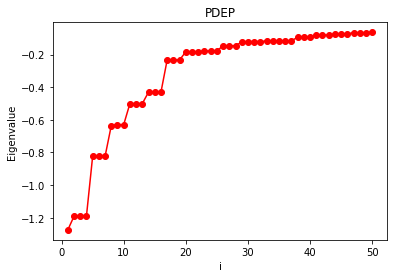

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# y : eigenvalues of the dielectic matrix
y = data['exec']['davitr'][-1]['ev']
# x : index of eigenvalue
x = np.arange(1, len(y)+1, 1)

print('y : ', y)
print('x : ', x)

# plot
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ro-')

plt.xlabel('i')
plt.ylabel('Eigenvalue')

plt.title('PDEP')

plt.show()

We can track how the eigenvalues converge during the iterative diagonalization.

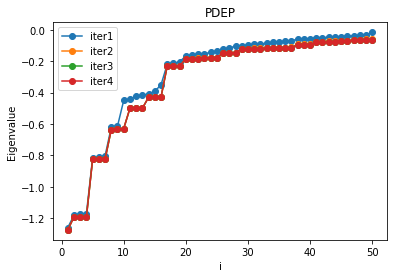

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# y : eigenvalues of the dielectic matrix (now for every iteration)
y = []
for i in range(data['exec']['ndav']) :
    y.append(data['exec']['davitr'][i]['ev'])
# x : index of the eigenvalues
x = np.arange(1, len(y[0])+1, 1)

# plot
fig, ax = plt.subplots(1, 1)

for i in range(data['exec']['ndav']) :
    ax.plot(x, y[i], 'o-', label='iter'+str(i+1))

plt.xlabel('i')
plt.ylabel('Eigenvalue')

plt.legend()

plt.title('PDEP')
plt.show()

**Question**: *How do we compute 70 eigenpotentials?*

~ *Edit the file below, execute it, and plot the eigenvalues!* ~

In [ ]:
import yaml

# read data: wstat.in --> input_data
with open('wstat.in') as file:
    input_data = yaml.load(file, Loader=yaml.FullLoader)

# pretty print
print('input_data')
print(yaml.dump(input_data, sort_keys=False))

# modify the variable n_pdep_eigen in input_data
# input_data[..........  EDIT HERE ...............] = 70

# write data to YAML file: input_data --> wstat_70.in
with open('wstat_70.in', 'w') as file:
    yaml.dump(input_data, file, sort_keys=False)

# show content of the file
print('wstat_70.in')
!cat wstat_70.in

In [ ]:
!mpirun -n 8 wstat.x -i wstat_70.in > wstat_70.out

Now plot the data and compare.